### Direct Controller Analysis

This notebook contains the analysis of the direct controller across temperatures.

In [107]:
import import_ipynb
from kinetic_parameters import rate

import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd

Text(0, 0.5, 'O (nM)')

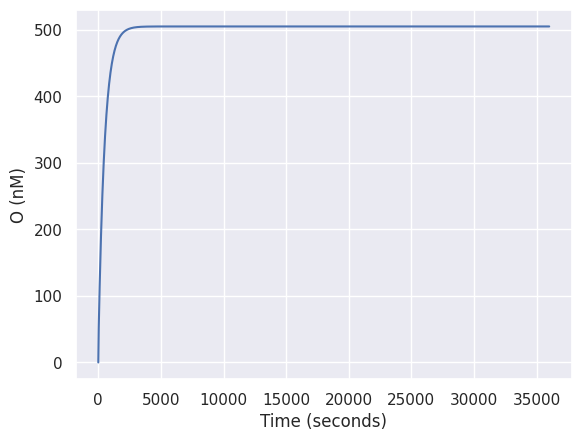

In [128]:
def dcl_solution(conds):
    temp = conds["temperature"]
    PX = conds["PX"]
    PY = conds["PY"]
    
    X0 = conds["X_init"]
    Y0 = conds["Y_init"]
    A0 = conds["A_init"]
    PY_plus0 = conds["PY_plus_init"]
    O0 = conds["O_init"]
    
    parameters = rate(controller="direct_closed_loop", temperature_C=temp)
    
    t = np.linspace(0, conds["t_end"], conds["t_steps"])
    
    def system(vars, t):
        X, Y, A, PY_plus, O = vars

        dXdt = parameters["alpha_X"]*PX - parameters["delta_X"] - parameters["kappa"]*X*Y - parameters["omega"]*X*PY + parameters["nu"]*PY_plus
        dYdt = parameters["alpha_Y"]*PY + parameters["alpha_Y+"]*PY_plus - parameters["delta_Y"]*Y - parameters["kappa"]*X*Y
        dAdt = 0
        dPY_plusdt = parameters["omega"]*X*PY - parameters["nu"]*PY_plus
        dOdt = parameters["alpha_O"]*PY + parameters["alpha_O+"]*PY_plus - parameters["delta_O"]*O
        return [dXdt, dYdt, dAdt, dPY_plusdt, dOdt]
    
    initial_conditions = [X0, Y0, A0, PY_plus0, O0]
    
    solution = scipy.integrate.odeint(system, initial_conditions, t)
    
    response = pd.DataFrame({
        "time[s]": t,
        "X": solution[:, 0],
        "Y": solution[:, 1],
        "A": solution[:, 2],
        "PY_+": solution[:, 3],
        "O": solution[:, 4],
    })
    
    return response

conds = {
    "temperature": 25,
    "PX": 10,
    "PY": 20,
    "X_init": 0,
    "Y_init": 0,
    "A_init": 0,
    "PY_plus_init": 0,
    "O_init": 0,
    "t_end": 36000,
    "t_steps": 1000,
}

results = dcl_solution(conds)

plt.plot(results["time[s]"], results["O"])
plt.xlabel("Time (seconds)")
plt.ylabel("O (nM)")